In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

In [2]:
df = pd.read_csv('data.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2278 entries, 0 to 2277
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Age            2278 non-null   object
 1   Condition      2278 non-null   object
 2   Date           2278 non-null   object
 3   Drug           2278 non-null   object
 4   DrugId         2278 non-null   int64 
 5   EaseofUse      2278 non-null   int64 
 6   Effectiveness  2278 non-null   int64 
 7   Reviews        2278 non-null   object
 8   Satisfaction   2278 non-null   int64 
 9   Sex            2278 non-null   object
 10  Sides          2278 non-null   object
 11  UsefulCount    2278 non-null   int64 
dtypes: int64(5), object(7)
memory usage: 213.7+ KB


In [3]:
df['Date'] = df['Date'].astype('datetime64[ns]')

In [4]:
min(df['Date'])

Timestamp('2007-09-18 00:00:00')

In [5]:
max(df['Date'])

Timestamp('2020-02-27 00:00:00')

In [6]:
df = df.drop_duplicates('Reviews')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1363 entries, 0 to 2274
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Age            1363 non-null   object        
 1   Condition      1363 non-null   object        
 2   Date           1363 non-null   datetime64[ns]
 3   Drug           1363 non-null   object        
 4   DrugId         1363 non-null   int64         
 5   EaseofUse      1363 non-null   int64         
 6   Effectiveness  1363 non-null   int64         
 7   Reviews        1363 non-null   object        
 8   Satisfaction   1363 non-null   int64         
 9   Sex            1363 non-null   object        
 10  Sides          1363 non-null   object        
 11  UsefulCount    1363 non-null   int64         
dtypes: datetime64[ns](1), int64(5), object(6)
memory usage: 138.4+ KB


In [7]:
df.isnull().sum().sum()

0

In [8]:
df_ost = df.loc[df['Condition'].str.contains("Osteoporosis", case=False)]

In [9]:
df_ost.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1363 entries, 0 to 2274
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Age            1363 non-null   object        
 1   Condition      1363 non-null   object        
 2   Date           1363 non-null   datetime64[ns]
 3   Drug           1363 non-null   object        
 4   DrugId         1363 non-null   int64         
 5   EaseofUse      1363 non-null   int64         
 6   Effectiveness  1363 non-null   int64         
 7   Reviews        1363 non-null   object        
 8   Satisfaction   1363 non-null   int64         
 9   Sex            1363 non-null   object        
 10  Sides          1363 non-null   object        
 11  UsefulCount    1363 non-null   int64         
dtypes: datetime64[ns](1), int64(5), object(6)
memory usage: 138.4+ KB


In [10]:
print(df_ost['Condition'].unique())
print(df_ost['Condition'].unique().size)

['Osteoporosis' 'Post-Menopausal Osteoporosis Prevention'
 'Osteoporosis in Male Patient'
 'Aromatase Inhibitor Drug-Induced Osteoporosis'
 'Osteoporosis in Men due to Deficient Function of Testis'
 'Glucocorticoid-Induced Osteoporosis Prevention'
 'Osteoporosis caused by Glucocorticoid Drugs'
 'osteoporosis in postmenopausal woman at high risk for fracture'
 'Osteoporosis caused by Anti-Androgen Drugs']
9


In [11]:
df_ost['Age'].unique()

array(['25-34', '45-54', '65-74', '75 or over', '55-64', '35-44', ' ',
       '19-24', '13-18', '7-12'], dtype=object)

In [12]:
df_ost["Age"] = df_ost["Age"].replace(
    ["25-34","45-54","65-74","75 or over","55-64","35-44","19-24","13-18","7-12"], 
    ["25-34","45-54", "65-74", "75+", "55-64", "35-44", "19-24", "13-18", "7-12"])


<AxesSubplot:title={'center':'Ratings Across Age Group'}, xlabel='Age', ylabel='count'>

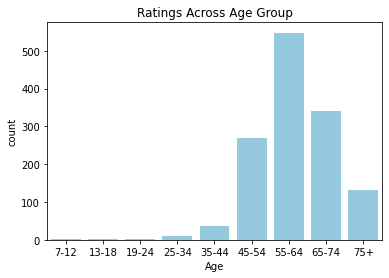

In [45]:
plt.title('Ratings Across Age Group')
sns.countplot(x = 'Age', data = df_ost, color = 'skyblue', order=["7-12", "13-18", "19-24", "25-34", "35-44", "45-54", "55-64", "65-74", "75+"])

In [14]:
print(min(df_ost['Date']))
print(max(df_ost['Date']))

2007-09-18 00:00:00
2020-02-27 00:00:00


In [15]:
print("number of males: ", sum(df_ost['Sex'] == 'Male'))
print("number of females: ", sum(df_ost['Sex'] == 'Female'))

number of males:  71
number of females:  1116


In [16]:
df_ost['Year'] = df_ost['Date'].dt.year

<AxesSubplot:title={'center':'Distribution of Satisfaction'}, xlabel='Satisfaction', ylabel='Count'>

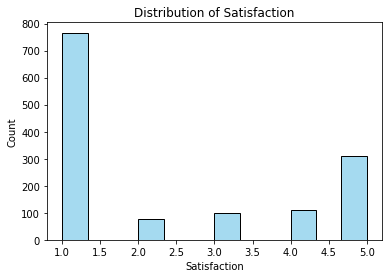

In [17]:
plt.title('Distribution of Satisfaction')
sns.histplot(x="Satisfaction", color = 'skyblue', data = df_ost)

In [18]:
df_ost.groupby('Drug')['Satisfaction'].mean().sort_values(ascending=False).reset_index()

,Drug,Satisfaction
0,liquid calcium + vitamin d,5.0
1,junel,5.0
2,calcium 600 with soy,5.0
3,"menostar patch, transdermal weekly",5.0
4,calcium-magnesium-zinc 333 mg-133 mg-5 mg tablet,5.0
...,...,...
66,"estradiol transdermal patch patch, weekly",1.0
67,calcitrate,1.0
68,oyster shell + d,1.0
69,os-cal 500-vit d3,1.0


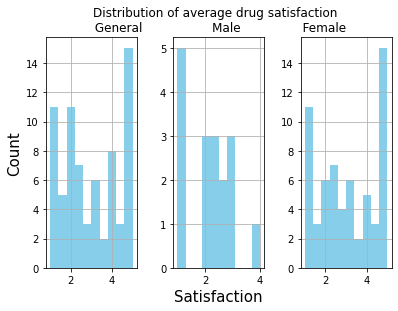

In [19]:
rating_avgs = (df_ost['Satisfaction'].groupby(df_ost['Drug']).mean())
#rating_avgs.hist(color='skyblue')
#plt.title('Distribution of average drug satisfaction')
#plt.xlabel('Satisfaction')
#plt.ylabel('Count')

df_ost_male = df_ost[df_ost['Sex'] == 'Male']
male_rating_avgs = (df_ost_male['Satisfaction'].groupby(df_ost['Drug']).mean())
#male_rating_avgs.hist(color='skyblue')
#plt.title('Distribution of average drug satisfaction - Male')
#plt.xlabel('Satisfaction')
#plt.ylabel('Count')


df_ost_female = df_ost[df_ost['Sex'] == 'Female']
female_rating_avgs = (df_ost_female['Satisfaction'].groupby(df_ost['Drug']).mean())
#female_rating_avgs.hist(color='skyblue')
#plt.title('Distribution of average drug satisfaction - Female')
#plt.xlabel('Satisfaction')
#plt.ylabel('Count')


fig, axs = plt.subplots(ncols=3)
rating_avgs.hist(color='skyblue', ax=axs[0])
male_rating_avgs.hist(color='skyblue', ax=axs[1])
female_rating_avgs.hist(color='skyblue', ax=axs[2])
axs[1].set_xlabel('Satisfaction', fontsize = 15)
axs[0].set_ylabel('Count', fontsize = 15)
axs[1].set_title('Distribution of average drug satisfaction  \n General                  Male                Female')
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)

Text(0.5, 1.0, 'Top20 : The number of drugs per condition.')

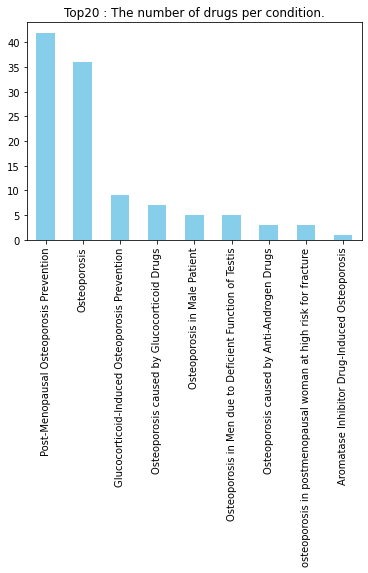

In [20]:
condition_dn = df_ost.groupby(['Condition'])['Drug'].nunique().sort_values(ascending=False)
condition_dn[0:20].plot(kind="bar",color="skyblue")
plt.xlabel("")
plt.ylabel("")
plt.title("Top20 : The number of drugs per condition.")

#figsize = (14,6), fontsize = 10,

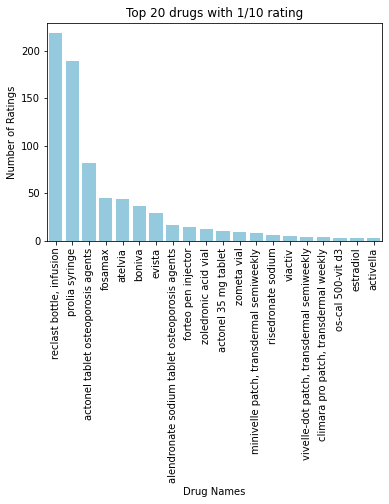

In [21]:
# This barplot shows the Top 20 drugs with the 1/10 rating

# Setting the Parameter
#sns.set(font_scale = 1.2, style = 'darkgrid')
#plt.rcParams['figure.figsize'] = [15, 8]

rating = dict(df_ost.loc[df_ost.Satisfaction == 1, "Drug"].value_counts())
drugname = list(rating.keys())
drug_rating = list(rating.values())

sns_rating = sns.barplot(x = drugname[0:20], y = drug_rating[0:20], color = 'skyblue')

sns_rating.set_title('Top 20 drugs with 1/10 rating')
sns_rating.set_ylabel("Number of Ratings")
sns_rating.set_xlabel("Drug Names")
plt.setp(sns_rating.get_xticklabels(), rotation=90);

In [22]:
# Make dictionary of conditions, each value will be a dataframe of all of the drugs used to treat the given condition
help_dict = {}

# Iterate over conditions
for i in df_ost.Condition.unique():
    
    temp_ls = []
    
    # Iterate over drugs within a given condition
    for j in df_ost[df_ost.Condition == i].Drug.unique():
        
        # If there are at least 10 reviews for a drug, save its name and average rating in temporary list
        if np.sum(df_ost.Drug == j) >= 10:
            temp_ls.append((j, np.sum(df_ost[df_ost.Drug == j].Satisfaction) / np.sum(df_ost.Drug == j)))
        
    # Save temporary list as a dataframe as a value in help dictionary, sorted best to worst drugs
    help_dict[i] = pd.DataFrame(data=temp_ls, columns=['drug', 'average_rating']).sort_values(by='average_rating', ascending=False).reset_index(drop=True)

In [23]:
help_dict['Osteoporosis'].iloc[:100]

,drug,average_rating
0,"reclast bottle, infusion",2.735043
1,zometa vial,2.176471
2,prolia syringe,2.036630
3,actonel 35 mg tablet,2.000000
4,actonel tablet osteoporosis agents,1.917355
5,atelvia,1.706897
6,zoledronic acid vial,1.571429


In [29]:
df_drug1 = df_ost.loc[df_ost['Drug'].str.contains("reclast bottle, infusion", case=False)]
df_drug2 = df_ost.loc[df_ost['Drug'].str.contains("zometa vial", case=False)]
df_drug3 = df_ost.loc[df_ost['Drug'].str.contains("prolia syringe", case=False)]
df_drug4 = df_ost.loc[df_ost['Drug'].str.contains("actonel 35 mg tablet", case=False)]

<AxesSubplot:xlabel='Year', ylabel='Satisfaction'>

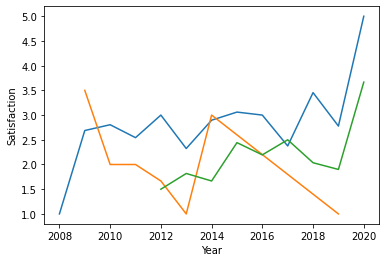

In [36]:
sns.lineplot(x = 'Year', y = 'Satisfaction', data=df_drug1.groupby("Year")["Satisfaction"].mean().reset_index())
sns.lineplot(x = 'Year', y = 'Satisfaction', data=df_drug2.groupby("Year")["Satisfaction"].mean().reset_index())
sns.lineplot(x = 'Year', y = 'Satisfaction', data=df_drug3.groupby("Year")["Satisfaction"].mean().reset_index())
#sns.lineplot(x = 'Year', y = 'Satisfaction', data=df_drug4.groupby("Year")["Satisfaction"].mean().reset_index())

<AxesSubplot:title={'center':'Ratings for Women Across Age Group'}, xlabel='Age', ylabel='Satisfaction'>

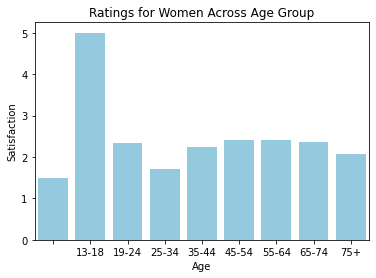

In [43]:
plt.title('Ratings for Women Across Age Group')
sns.barplot(x='Age', y = 'Satisfaction', data = df_ost_female.groupby("Age")["Satisfaction"].mean().reset_index(), color = 'skyblue')

<AxesSubplot:title={'center':'Ratings for Men Across Age Group'}, xlabel='Age', ylabel='Satisfaction'>

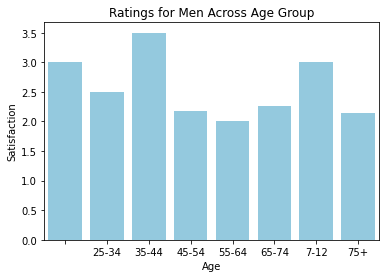

In [44]:
plt.title('Ratings for Men Across Age Group')
sns.barplot(x='Age', y = 'Satisfaction', data = df_ost_male.groupby("Age")["Satisfaction"].mean().reset_index(), color = 'skyblue')